<a href="https://colab.research.google.com/github/Harrisson3/diabetes/blob/main/hamlet_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135
              AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  

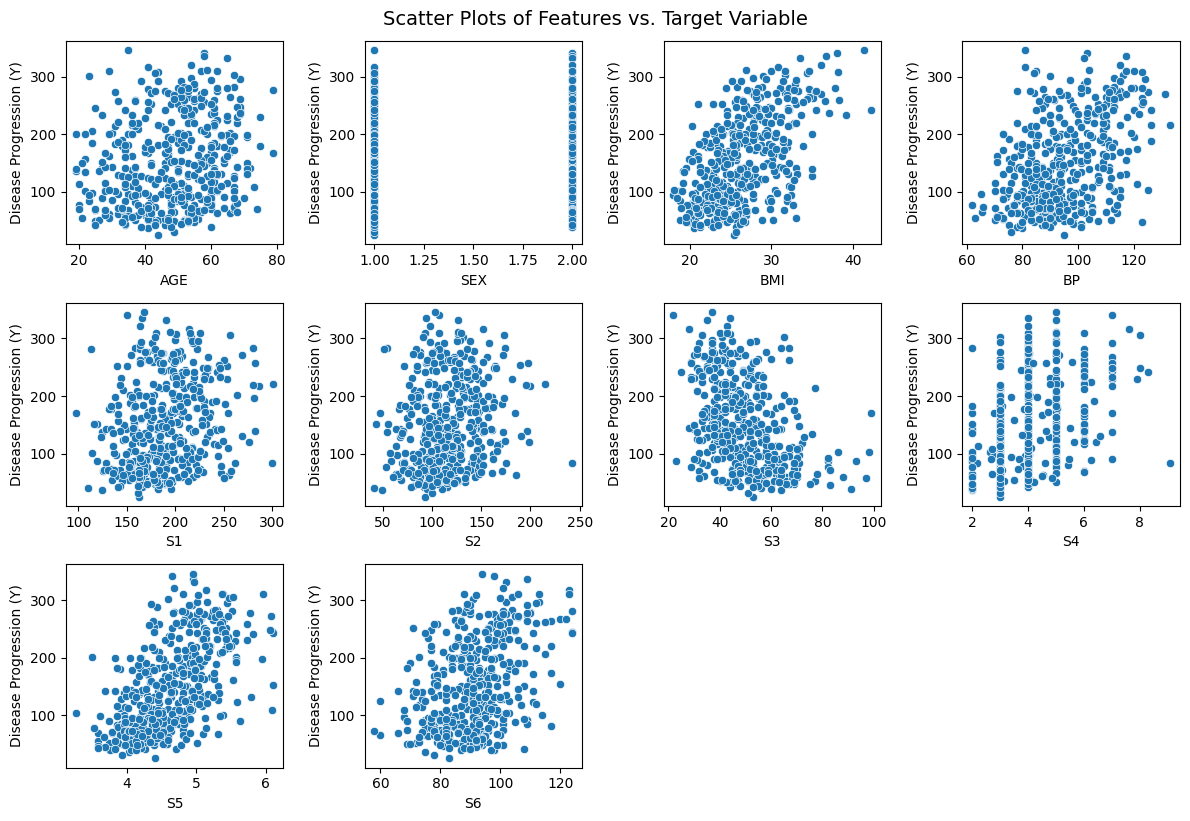

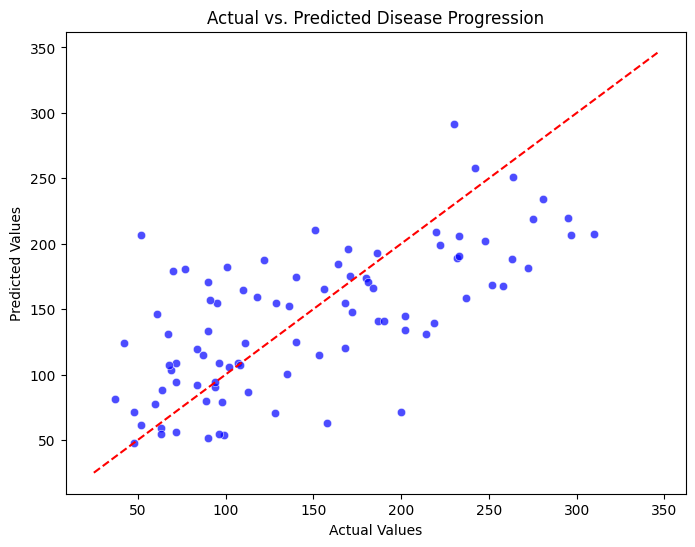

Mean Squared Error (MSE): 2900.19
Root Mean Squared Error (RMSE): 53.85
R-squared (R²): 0.4526


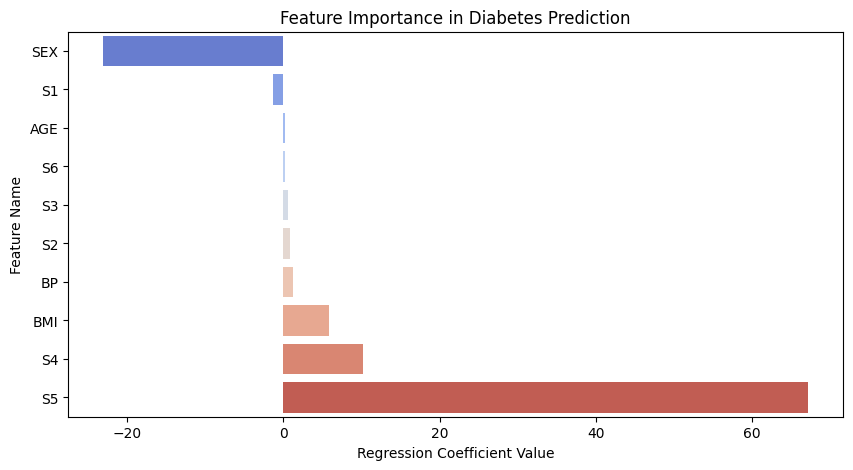

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the dataset from an external URL
url = "https://github.com/Harrisson3/diabetes/raw/main/diabetes.xlsx"
df = pd.read_excel(url)

# Display first few rows to understand the data structure
print(df.head())

# Step 3: Explore the Data
print(df.describe())
print(df.info())

# Step 4: Visualize Feature Relationships with Scatter Plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):  # Exclude target variable ('Y')
    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=df[column], y=df['Y'])
    plt.xlabel(column)
    plt.ylabel('Disease Progression (Y)')
    plt.tight_layout()
plt.suptitle("Scatter Plots of Features vs. Target Variable", fontsize=14, y=1.02)
plt.show()

# Step 5: Split the Data into Training and Testing Sets
X = df.drop(columns=['Y'])  # Features (assuming 'Y' is the target variable)
y = df['Y']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Test the Model
y_pred = model.predict(X_test)

# Step 8: Visualize Expected vs. Predicted Values using Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')  # Ideal prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Disease Progression")
plt.show()

# Step 9: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# Step 10: Feature Importance Analysis with Matplotlib and Seaborn
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index, hue=feature_importance.index, palette="coolwarm", legend=False)
plt.xlabel("Regression Coefficient Value")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Diabetes Prediction")
plt.show()
